### **PROJECT: MOVIE GENRE CLASSIFICATION**

---
## By : Tehseen Meo



>



## **Import Libraries**

In [52]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

### **Load Train Data**

In [37]:
# Load the dataset (assuming it's in a CSV file with 'Description' and 'Genre' columns)
train_data = pd.read_csv("train_data.txt",sep=':::', names=['Title','Genre' ,'Description'])
train_data.head(3)

<ipython-input-37-9adfc160495d>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['Title','Genre' ,'Description'])


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


### **Load Test Data**

In [38]:
test_data = pd.read_csv("test_data.txt",sep=':::', names=['Id', 'Title', 'Description'])
test_data.head(3)

<ipython-input-38-da48d3d7e341>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['Id', 'Title', 'Description'])


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...


# **Data Preprocessing**

In [40]:
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Title          0
Genre          0
Description    0
dtype: int64

In [41]:
#Count each genre value
train_data.Genre.value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

# **Split dataset**

## **Feature extraction using TF-IDF**

In [42]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Transform the plot summaries into TF-IDF features
X_train = tfidf_vectorizer.fit_transform(train_data['Description'])
X_test = tfidf_vectorizer.transform(test_data['Description'])

#**Train a logistic regression model**

In [43]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, train_data['Genre'])

LogisticRegression(max_iter=1000)

# **Make predictions on the test data**

In [44]:
# Predict genre on test data
predictions = logistic_regression.predict(X_test)

## **Evaluate Model**

In [ ]:
# Evaluate the model

### **Load Test solution Data**

In [39]:
test_sol_path = "/content/test_data_solution.txt"
test_sol_data = pd.read_csv(test_sol_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_sol_data.drop(columns=['Id'], inplace=True)
test_sol_data.rename(columns = {'Title':'Actual Genre'}, inplace = True)
test_sol_data.head(3)

,Actual Genre,Description
1,thriller,"L.R. Brane loves his life - his car, his apar..."
2,comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,documentary,One year in the life of Albin and his family ...


In [65]:
# Create a DataFrame with actual and predicted genres
results = pd.DataFrame({'Actual Genre': test_sol_data['Actual Genre'], 'Predicted Genre': predictions})

In [66]:
#Classification Report
print(classification_report(test_sol_data['Actual Genre'], predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.47      0.28      0.35      1314
       adult        0.62      0.25      0.36       590
   adventure        0.58      0.15      0.24       775
   animation        0.50      0.05      0.09       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.59      0.56      7446
       crime        0.36      0.03      0.06       505
 documentary        0.68      0.86      0.76     13096
       drama        0.55      0.77      0.64     13612
      family        0.49      0.09      0.15       783
     fantasy        0.59      0.03      0.06       322
   game-show        0.89      0.50      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.64      0.56      0.60      2204
       music        0.65      0.47      0.55       731
     musical        0.31      0.02      0.03       276
     mystery        0.40      0.01      0.01       318
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Calculate accuracy
accuracy = accuracy_score(test_sol_data['Actual Genre'], predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5887638376383764


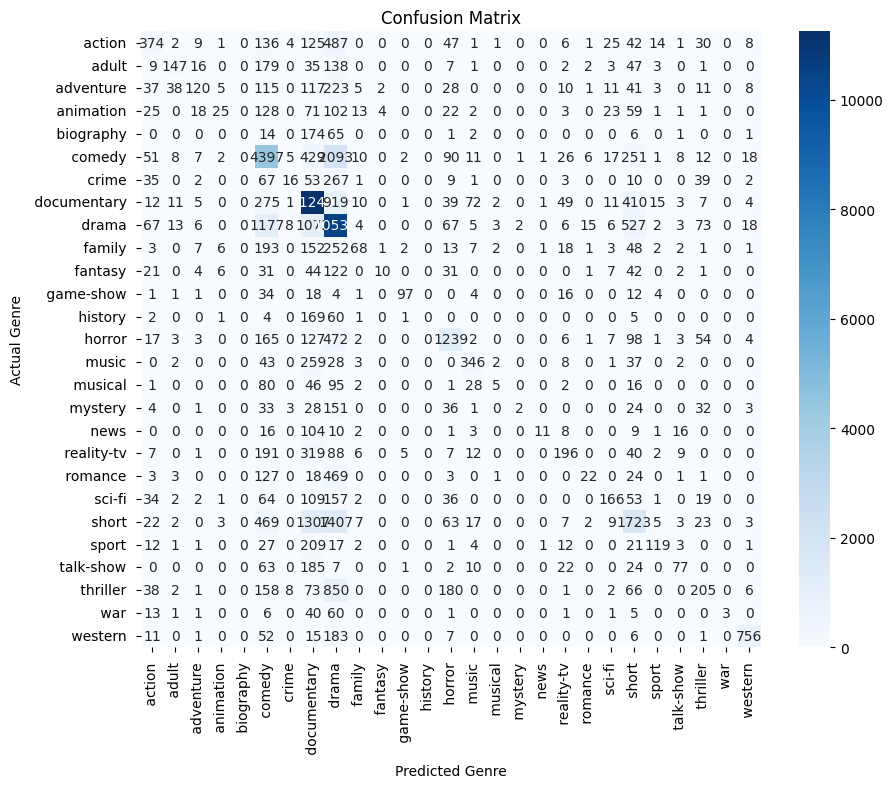

In [54]:
# confusion matrix
conf_matrix = confusion_matrix(test_sol_data['Actual Genre'], predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_regression.classes_, yticklabels=logistic_regression.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

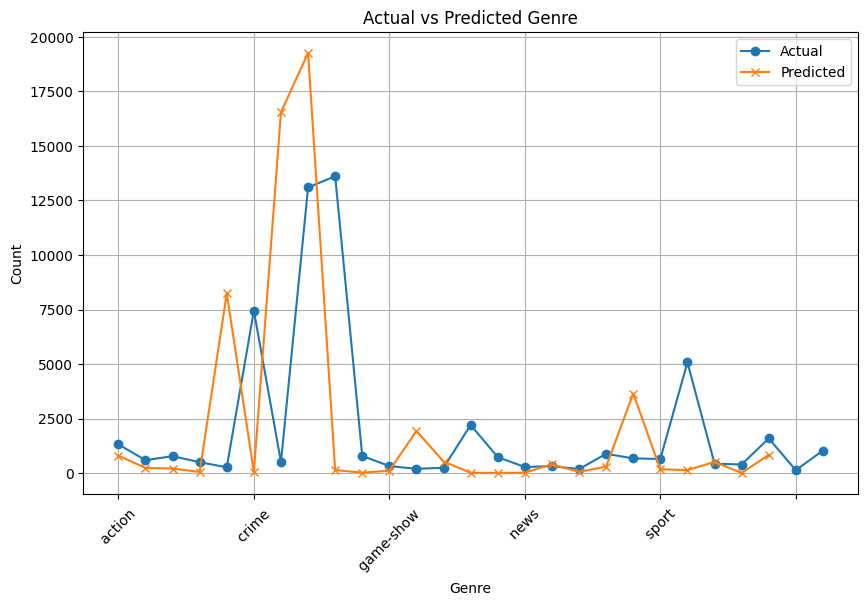

In [69]:
# Count occurrences of each genre
actual_genre_counts = results['Actual Genre'].value_counts().sort_index()
predicted_genre_counts = results['Predicted Genre'].value_counts().sort_index()

# Plot line graph
plt.figure(figsize=(10, 6))
actual_genre_counts.plot(label='Actual', marker='o')
predicted_genre_counts.plot(label='Predicted', marker='x')
plt.title('Actual vs Predicted Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show

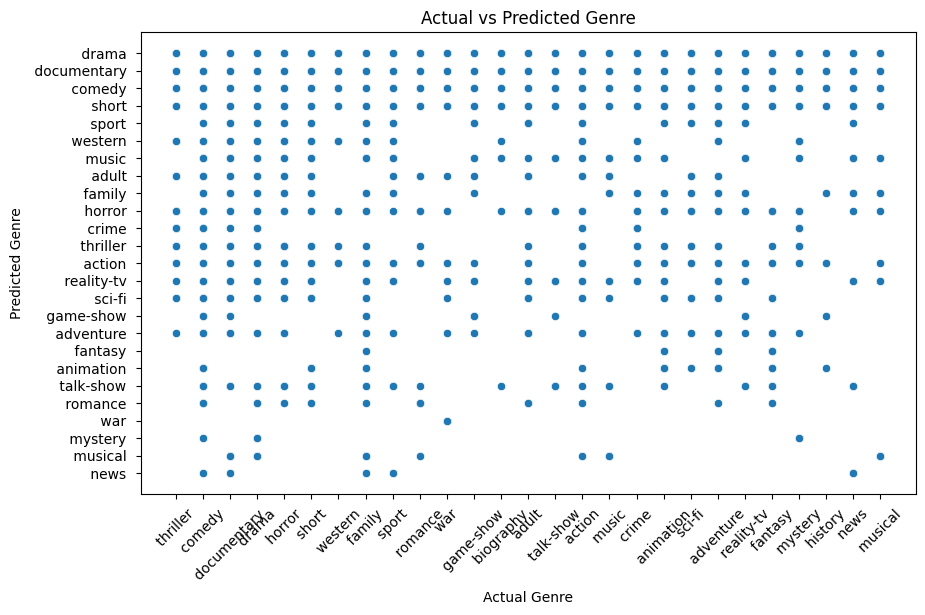

In [67]:
# Plot a simple logistic graph of actual versus predicted output
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Genre', y='Predicted Genre', data=results)
plt.title('Actual vs Predicted Genre')
plt.xlabel('Actual Genre')
plt.ylabel('Predicted Genre')
plt.xticks(rotation=45)
plt.show()

# **Predict Unknown Movie**

In [60]:
# Predict unknown data
unknown_description = ["Press is a story of young people overwhelmed by social discord and their surroundings. The film concisely depicts multiple factors underlying this situation. These are things that could affect any of us. People tend to clam up and stop communicating when depressed or upset. It is also not uncommon for people to note the expression on an individual's face and decide to leave them alone, even if the individual concerned does not actually consider their problem to be serious. The events in this film are no exaggeration. Rather, they are emblematic of a modern disease, in which a family and those surrounding it slip into a negative momentum. How to address the problem of communication breakdown is a question with great value and meaning for contemporary society."]
unknown_description_tfidf = tfidf_vectorizer.transform(unknown_description)
predicted_genre = logistic_regression.predict(unknown_description_tfidf)
print("Predicted Genre for Unknown Data:", predicted_genre[0])


Predicted Genre for Unknown Data:  drama 
